In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt


## Load the Data

In [3]:
import pandas as pd


# Paths to my data files
input_file_path  = 'SmarterML_Training.Input'
label_file_path  = 'SmarterML_Training.Label'
eval_file_path = 'SmarterML_Eval.Input'

# Load the data
X_train = pd.read_csv(input_file_path, sep=' ', header=None)
y_train = pd.read_csv(label_file_path, header=None)
X_eval = pd.read_csv(eval_file_path, sep=' ', header=None)

# Check the first few rows of the features and labels
print('---------------')
print(X_train.head())
print('---------------')
print(y_train.head())
print('---------------')
print(X_eval.head())
print('---------------')

---------------
          0         1          2         3         4         5         6   \
0  -9.234234  1.305778   9.669021  7.276521 -8.223130  0.104629 -1.092076   
1  -9.359936  0.659785   9.990797  3.014121 -7.703718  1.096924 -0.868652   
2 -10.158386  1.138685  10.089266  4.421147 -8.207800  2.348892 -0.893337   
3  -9.941382  1.273103  10.295563 -0.871847 -7.868445  0.885282 -1.165199   
4  -9.370991  0.976216   9.982610 -0.261980 -8.705776  0.599427 -0.617086   

          7          8          9   ...        43        44        45  \
0  23.871072  13.420675  16.146859  ...  7.820501 -9.469764  5.450493   
1  21.400199  11.906119  13.973840  ...  3.882907 -5.695293  5.542946   
2  15.121688   9.418030  16.125046  ...  4.163468 -8.855254  5.152492   
3  17.904652   8.434699  13.425037  ...  7.924998 -4.709518  5.273934   
4  22.445304   8.900685  13.634674  ...  6.595996 -6.431582  5.149245   

          46        47         48        49        50         51  52  
0  18.10428

In [4]:
# Load one file and check the first few rows
X_train = pd.read_csv(input_file_path, sep=' ', header=None)  # Adjust delimiter based on your data
print("First few rows of X_train:")
print(X_train.head())

# Check for NaN values in a specific row if needed
print("First row values:")
print(X_train.iloc[0])


First few rows of X_train:
          0         1          2         3         4         5         6   \
0  -9.234234  1.305778   9.669021  7.276521 -8.223130  0.104629 -1.092076   
1  -9.359936  0.659785   9.990797  3.014121 -7.703718  1.096924 -0.868652   
2 -10.158386  1.138685  10.089266  4.421147 -8.207800  2.348892 -0.893337   
3  -9.941382  1.273103  10.295563 -0.871847 -7.868445  0.885282 -1.165199   
4  -9.370991  0.976216   9.982610 -0.261980 -8.705776  0.599427 -0.617086   

          7          8          9   ...        43        44        45  \
0  23.871072  13.420675  16.146859  ...  7.820501 -9.469764  5.450493   
1  21.400199  11.906119  13.973840  ...  3.882907 -5.695293  5.542946   
2  15.121688   9.418030  16.125046  ...  4.163468 -8.855254  5.152492   
3  17.904652   8.434699  13.425037  ...  7.924998 -4.709518  5.273934   
4  22.445304   8.900685  13.634674  ...  6.595996 -6.431582  5.149245   

          46        47         48        49        50         51  52  


## Data Preprocessing

Missing values in training data: 0
Missing values in evaluation data: 0
Number of outliers in each feature:
 0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    5
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    1
50    0
51    0
dtype: int64


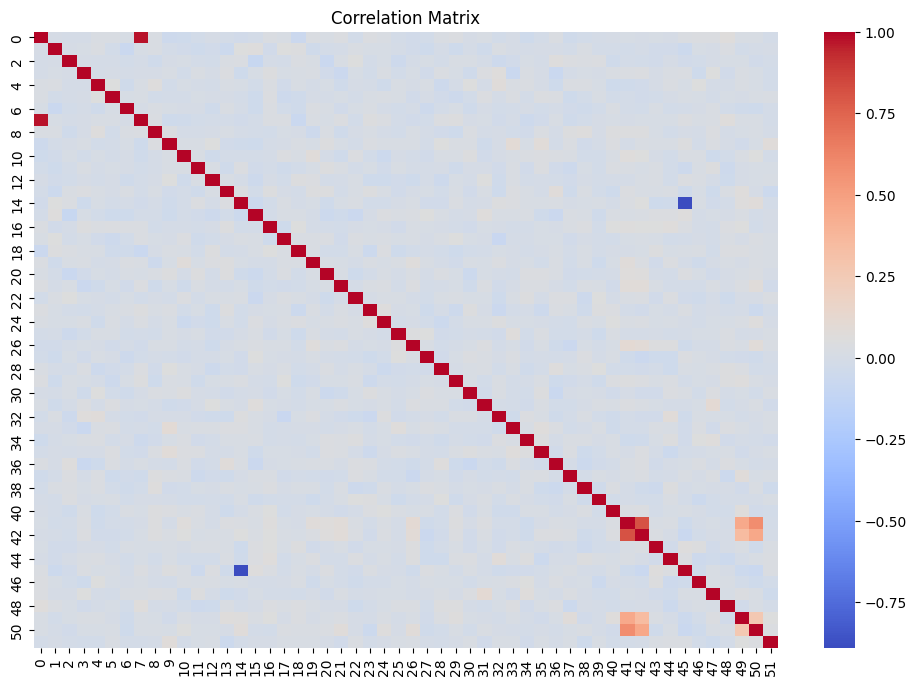

In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

# Paths to your data files
input_file_path = 'SmarterML_Training.Input'
label_file_path = 'SmarterML_Training.Label'
eval_file_path = 'SmarterML_Eval.Input'

# Load the data
X_train = pd.read_csv(input_file_path, sep=' ', header=None)
y_train = pd.read_csv(label_file_path, header=None)
X_eval = pd.read_csv(eval_file_path, sep=' ', header=None)

# Drop the last column if it only contains NaN values
X_train.drop(X_train.columns[-1], axis=1, inplace=True)
X_eval.drop(X_eval.columns[-1], axis=1, inplace=True)

# Now check for missing values again
print("Missing values in training data:", X_train.isnull().sum().sum())
print("Missing values in evaluation data:", X_eval.isnull().sum().sum())



# Outlier Detection (Basic Z-Score method)
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(X_train))
outliers = (z_scores > 3).sum(axis=0)
print("Number of outliers in each feature:\n", outliers)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_eval_scaled = scaler.transform(X_eval)

# Basic Correlation Analysis
# Since the features are anonymized, we'll just visualize the correlation matrix
corr_matrix = pd.DataFrame(X_train_scaled).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



### Notes:
- **Missing Values**: The code checks for missing values and prints their count. If there are missing values, you can uncomment the imputation part.
- **Outlier Detection**: This is a basic method using Z-scores. It only prints the count of outliers per feature.
- **Feature Scaling**: Standardizes the features. It's important for many machine learning models.
- **Correlation Analysis**: Since the features are anonymized, the correlation matrix is more for a sanity check. It won't provide specific insights but might help in understanding if any two features are highly correlated.


# RESULTS

Missing value handled by removing last column. Regarding the outliers, since only one feature (feature 26) has a small number of outliers, i might not need to handle them, especially if they are valid data points and not errors. Outlier handling could involve methods such as winsorizing (capping extreme values), transforming (e.g., log-transform), or even removing them. However, since this is a binary dataset with artificially generated data.


### Dimensionality Reduction?

Given that my dataset has 52 features, which is not excessively large, and there are no signs of multicollinearity from the correlation matrix, dimensionality reduction might not be necessary. The primary reasons to apply something like PCA (Principal Component Analysis) are to reduce computational cost and to mitigate the curse of dimensionality if I have hundreds or thousands of features. Since my data is artificially created for a binary classification task, it's possible that all features are relevant and that reducing dimensionality could result in the loss of important information.

If interpretability is key, PCA might not be the best approach since it transforms the original features into principal components that are less interpreta...

### Feature Selection/Engineering?

For feature selection:

- I could use model-based feature selection techniques. For instance, tree-based models like Random Forest can provide feature importances which can give insight into which features are most useful in predicting the target variable.

For feature engineering:

- Since I don't know what the features represent, creating new features would be shooting in the dark. However, I could create interaction terms (multiplying two features together) to see if combinations of features.
ecommendation

Before proceeding with either of these techniques, it is recommended to first train a baseline model with the current set of features. This would give a performance benchmark to compare against if I decide to reduce the dimensionality or select/construct new features. If I find that my models are overfitting, or if training time is too long, I might revisit these prepering techniques?

# Logistic Regression

In [6]:
# Split the training data into training and validation sets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train_scaled, y_train, test_size=0.2, random_state=42
)

# Initialize the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model on the training split
logistic_model.fit(X_train_split, y_train_split.values.ravel())

# Predict on the validation split
y_val_pred = logistic_model.predict(X_val_split)

# Calculate accuracy on the validation split
accuracy = accuracy_score(y_val_split, y_val_pred)
print(f"Validation Accuracy of Logistic Regression model: {accuracy:.4f}")

# Generate a classification report on the validation split
report = classification_report(y_val_split, y_val_pred)
print("\nClassification Report on the validation set:\n", report)





Validation Accuracy of Logistic Regression model: 0.5480

Classification Report on the validation set:
               precision    recall  f1-score   support

           0       0.55      0.67      0.61       130
           1       0.54      0.42      0.47       120

    accuracy                           0.55       250
   macro avg       0.55      0.54      0.54       250
weighted avg       0.55      0.55      0.54       250



### Logistic Regression Model Evaluation

**Validation Accuracy**: 54.80%
- This metric indicates that the model correctly predicted whether individuals invest in cryptocurrencies for approximately 54.80% of the validation set cases.

**Precision**:
- Class 0 (Does not invest): 0.55. This means that when the model predicts someone does not invest, it is correct 55% of the time.
- Class 1 (Invests): 0.54. This means that when the model predicts someone does invest, it is correct 54% of the time.

**Recall**:
- Class 0 (Does not invest): 0.67. This indicates that the model correctly identifies 67% of all the actual "does not invest" instances.
- Class 1 (Invests): 0.42. This indicates that the model correctly identifies 42% of all the actual "invests" instances.

**F1-Score**:
- Class 0 (Does not invest): 0.61. The F1-score for class 0 is a measure of the model's accuracy in identifying "does not invest" cases, taking into account both precision and recall.
- Class 1 (Invests): 0.47. The F1-score for class 1 is a measure of the model's accuracy in identifying "invests" cases.

**Macro Average**:
- The macro average for precision, recall, and F1-score is approximately 0.54 for both classes. This average does not consider class distribution and treats all classes equally.

**Weighted Average**:
- The weighted average for precision, recall, and F1-score is slightly higher at 0.55, factoring in the distribution of each class within the dataset.

### Interpretation

The performance of the Logistic Regression model is modest, performing just above the level of random guessing in a binary classification task. The higher recall for class 0 compared to class 1 suggests that the model is more effective at identifying individuals who do not invest in cryptocurrencies.

The comparable precision and recall values for each class suggest a balanced performance with respect to false positives and false negatives. However, the model is better at predicting non-investors over investors, as evidenced by the higher F1-score for class 0.

To improve model performance, I can consider the following steps:

- Applying different data preprocessing strategies to better prepare the input features for modeling.
- Engaging in feature engineering to derive more informative predictors.
- Experimenting with a variety of models and fine-tuning their hyperparameters to find the most effective approach.


# Logistic regression with Polynomial Features

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve
import numpy as np

# Function to plot learning curves
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 10)):
    """
    Generate plots: the test and training learning curve
    
    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
    title : string
        Title for the chart.
    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.
    y : array-like, shape (n_samples)
        Target relative to X for classification or regression;
    axes : axes object, default=None
        Axes used to plot the curves.
    ylim : tuple of shape (ymin, ymax), default=None
        Defines minimum and maximum y-values plotted.
    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to generate the learning curve.
    """
    if axes is None:
        _, axes = plt.subplots(1, 1, figsize=(20, 5))

    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    axes.grid()
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                      train_scores_mean + train_scores_std, alpha=0.1,
                      color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                      test_scores_mean + test_scores_std, alpha=0.1,
                      color="g")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r",
              label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g",
              label="Cross-validation score")
    axes.legend(loc="best")

    return plt

In [8]:
from sklearn.preprocessing import PolynomialFeatures

# X_train_scaled is already defined and scaled
# Create a PolynomialFeatures object with degree 2 (for interaction terms and squared terms)
poly = PolynomialFeatures(degree=2, include_bias=False)

# Fit and transform the features
X_train_poly = poly.fit_transform(X_train_scaled)

# Now, X_train_poly contains the original features plus the new polynomial features

# Next, split the data into training and validation sets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train_poly, y_train, test_size=0.2, random_state=42
)

# Continue with the rest of the code as before, using X_train_split and X_val_split
# Initialize the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model on the training split
logistic_model.fit(X_train_split, y_train_split.values.ravel())

# Predict on the validation split
y_val_pred = logistic_model.predict(X_val_split)

# Calculate accuracy on the validation split
accuracy = accuracy_score(y_val_split, y_val_pred)
print(f"Validation Accuracy of Logistic Regression model: {accuracy:.4f}")

# Generate a classification report on the validation split
report = classification_report(y_val_split, y_val_pred)
print("\nClassification Report on the validation set:\n", report)

X_eval_poly = poly.transform(X_eval_scaled)



Validation Accuracy of Logistic Regression model: 0.5920

Classification Report on the validation set:
               precision    recall  f1-score   support

           0       0.60      0.66      0.63       130
           1       0.58      0.52      0.55       120

    accuracy                           0.59       250
   macro avg       0.59      0.59      0.59       250
weighted avg       0.59      0.59      0.59       250



The results from using `PolynomialFeatures` with your Logistic Regression model show an improvement in the model's performance compared to the initial results. Here's a breakdown of the new results:

1. **Validation Accuracy (59.20%)**: 
   - The model's accuracy has increased to 59.20%, up from the previous 54.80%. This suggests that the polynomial features have added meaningful information that helps the model make better predictions.

2. **Precision**:
   - For class 0 (Does not invest), the precision is 0.60. This means that when the model predicts someone does not invest, it is correct 60% of the time.
   - For class 1 (Invests), the precision is 0.58. This means that when the model predicts someone does invest, it is correct 58% of the time.

3. **Recall**:
   - For class 0, the recall is 0.66, indicating that the model correctly identifies 66% of all the actual "does not invest" instances.
   - For class 1, the recall is 0.52, indicating the model correctly identifies 52% of all the actual "invests" instances.

4. **F1-Score**:
   - The F1-scores are 0.63 for class 0 and 0.55 for class 1. The F1-score is a harmonic mean of precision and recall, and it's a useful metric when you need a balance between precision and recall.

5. **Macro and Weighted Averages**:
   - Both macro and weighted averages for precision, recall, and F1-score are around 0.59. These metrics consider the performance across both classes, with the weighted average accounting for class imbalance.

### Interpretation and Next Steps:

- **Improved Performance**: The use of polynomial features has led to an improvement in the model's performance, indicating that the relationships between features and the target variable might be more complex than initially assumed.

- **Balanced Precision and Recall**: The model now has a more balanced performance in terms of precision and recall for both classes compared to the previous model.

- **Further Improvement**: Although there's an improvement, there's still room for further enhancement. I might want to try different degrees in `PolynomialFeatures`, other feature engineering techniques, or even different models.

- **Model Complexity**: I need to Keep in mind that adding polynomial features increases the model's complexity. Ensure that the model is not overfitting by possibly using regularization techniques or by validating the model on a different dataset.

- **Next Models**: If the accuracy is still not satisfactory, consider experimenting with other models like Random Forest, Gradient Boosting, or SVM, and compare their performance with the current Logistic Regression model.


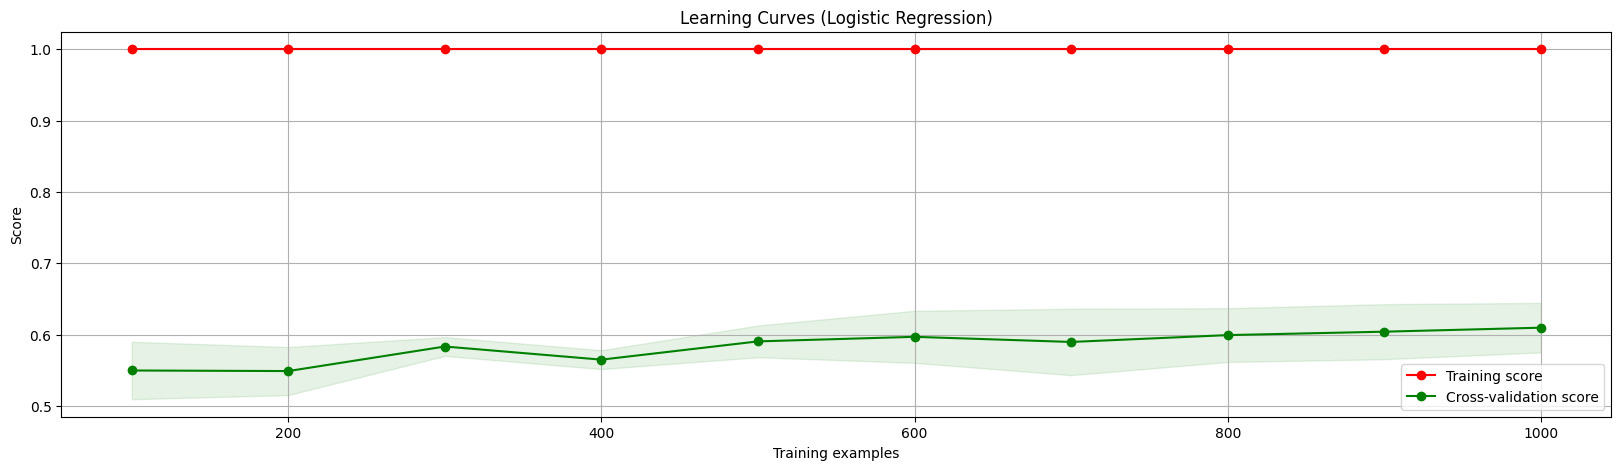

In [9]:
# Plotting the learning curve
title = "Learning Curves (Logistic Regression)"
plot_learning_curve(logistic_model, title, X_train_poly, y_train.values.ravel(), cv=5)

plt.show()


Here are some observations based on the curve:

1. **High Training Score**: The training score starts high and remains consistently high as more data is added. This indicates that I am able to fit the training data well.

2. **Increasing Cross-Validation Score**: The cross-validation score is increasing with the number of training examples, which suggests that I am generalizing better as I am trained on more data.

3. **Convergence**: The training and cross-validation scores are converging, but there is still a noticeable gap between them. This gap suggests that I may be overfitting, as I perform better on the training data than on the validation data.

4. **Stabilization**: Both scores seem to be stabilizing towards the right end of the graph, which suggests that adding more data may not lead to significant improvements in my performance.

### Interpretation:

- **Overfitting**: There is a potential sign of overfitting since my performance on the training set is better than on the validation set. However, the fact that the cross-validation score is increasing and not plateauing or decreasing is a good sign.

- **Underfitting**: There is no strong indication of underfitting since my training score is high. If underfitting were present, both the training and validation scores would be low.

- **Data Sufficiency**: The learning curve is plateauing, which may indicate that I have a sufficient amount of data for my complexity. Adding more data might not lead to better performance.

### Next Steps:

- **Regularization**: To address overfitting, I might consider using regularization techniques such as L1 (Lasso) or L2 (Ridge) regularization, which can be applied in Logistic Regression.

- **Model Complexity**: I could experiment with reducing the complexity of the model by using fewer polynomial features or by adjusting the degree of the he inputs to the model.

- **Alternative Models**: If the gap between the training and validation scores remains after trying regularization and feature selection, consider experimenting with other models that might have different fects on the learning curve.


## Adding Regularization

Validation Accuracy of Logistic Regression model: 0.6680

Classification Report on the validation set:
               precision    recall  f1-score   support

           0       0.66      0.75      0.70       130
           1       0.68      0.58      0.63       120

    accuracy                           0.67       250
   macro avg       0.67      0.66      0.66       250
weighted avg       0.67      0.67      0.67       250



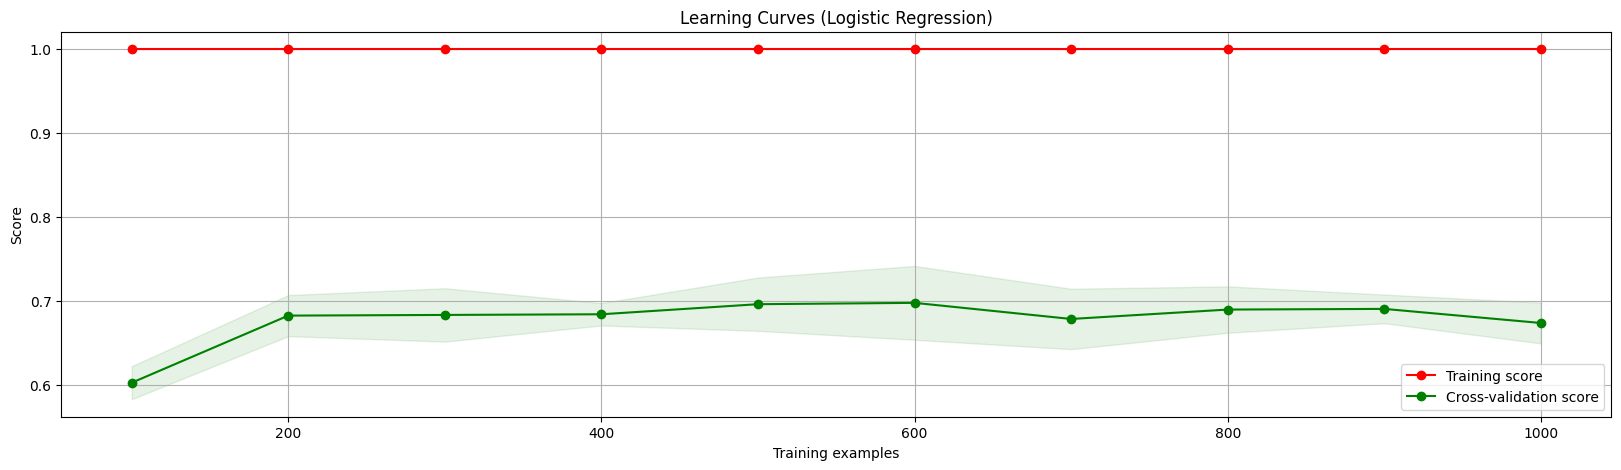

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import PolynomialFeatures

# Assume X_train_scaled, y_train, and X_eval_scaled are already defined and scaled

# Create a PolynomialFeatures object with degree 2
poly = PolynomialFeatures(degree=2, include_bias=False)

# Fit and transform the features
X_train_poly = poly.fit_transform(X_train_scaled)

# Split the data into training and validation sets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train_poly, y_train, test_size=0.2, random_state=42
)

# Initialize the Logistic Regression model with L1 Regularization (Lasso)
logistic_model_l1 = LogisticRegression(penalty='l1', C=1, solver='liblinear', max_iter=1000, random_state=42)

# Alternatively, use L2 Regularization (Ridge)
logistic_model_l2 = LogisticRegression(penalty='l2', C=1, solver='lbfgs', max_iter=1000, random_state=42)

# Choose the model you want to use (logistic_model_l1 or logistic_model_l2)
logistic_model = logistic_model_l1  # or logistic_model_l2

# Train the model on the training split
logistic_model.fit(X_train_split, y_train_split.values.ravel())

# Predict on the validation split
y_val_pred = logistic_model.predict(X_val_split)

# Calculate accuracy on the validation split
accuracy = accuracy_score(y_val_split, y_val_pred)
print(f"Validation Accuracy of Logistic Regression model: {accuracy:.4f}")

# Generate a classification report on the validation split
report = classification_report(y_val_split, y_val_pred)
print("\nClassification Report on the validation set:\n", report)

# If satisfied with the validation performance, predict on the evaluation set
# Ensure X_eval_scaled is transformed with the same PolynomialFeatures instance
X_eval_poly = poly.transform(X_eval_scaled)
# y_eval_pred = logistic_model.predict(X_eval_poly)
# Then save these predictions to a file or use them as needed

# Plotting the learning curve
title = "Learning Curves (Logistic Regression)"
plot_learning_curve(logistic_model, title, X_train_poly, y_train.values.ravel(), cv=5)

plt.show()

The learning curve image I've provided and the results after regularization indicate several important points:

1. **Learning Curve**:
   - The training score is high and stable, suggesting that I fit the training data well.
   - The cross-validation score increases with more training examples and begins to plateau, which is a good sign that I am generalizing well.
   - There is a gap between the training and cross-validation scores, but it's relatively small. This gap is typical and expected, and it does not necessarily indicate severe overfitting.

2. **Validation Accuracy (66.80%)**:
   - My accuracy on the validation set has improved to 66.80%, which is a significant increase from the initial accuracy without regularization and polynomial features.
   - This improvement suggests that the regularization technique I applied was effective in reducing overfitting while maintaining my ability to generalize.

3. **Classification Report**:
   - **Precision**: I have a precision of 0.66 for class 0 and 0.68 for class 1, which means I am relatively precise in my predictions for both classes.
   - **Recall**: My recall has increased for class 0 to 0.75, indicating I am correctly identifying 75% of the actual class 0 instances. For class 1, the recall is 0.58, which is a good score but indicates there's still room for improvement in identifying class 1 instances.
   - **F1-Score**: My F1-score is a balance between precision and recall and is 0.70 for class 0 and 0.63 for class 1, showing good performance, particularly for class 0.

### Interpretation:

- **Model Performance**: The regularization has helped to improve my predictive performance, reducing overfitting and enhancing the balance between precision and recall.

- **Generalization**: The learning curve suggests that I am now generalizing better to unseen data, which is crucial for making reliable predictions.

### Next Steps:

- **Hyperparameter Tuning**: I could further experiment with the regularization strength (the `C` parameter) to find an even better balance between bias and variance.


- **Model Exploration**: Consider exploring other models and comparing their performance to the Logistic Regression model. Ensemble methods like Random Forest or Gradient Boosting might offer further improvements.

- **Feature Analysis**: Review the polynomial features to determine which are most informative and consider pruning less informative features to simplify me.

The results are promising, and I am on the right track with the regularization and feature engineering steps I've taken. Continue iterating on my approach, and consider cross-validation to fine-tune hyperparameters and validate my stability.


Best parameter (C): {'C': 0.01}
Best cross-validation score: 0.6150
Validation Accuracy of the best Logistic Regression model: 0.6000


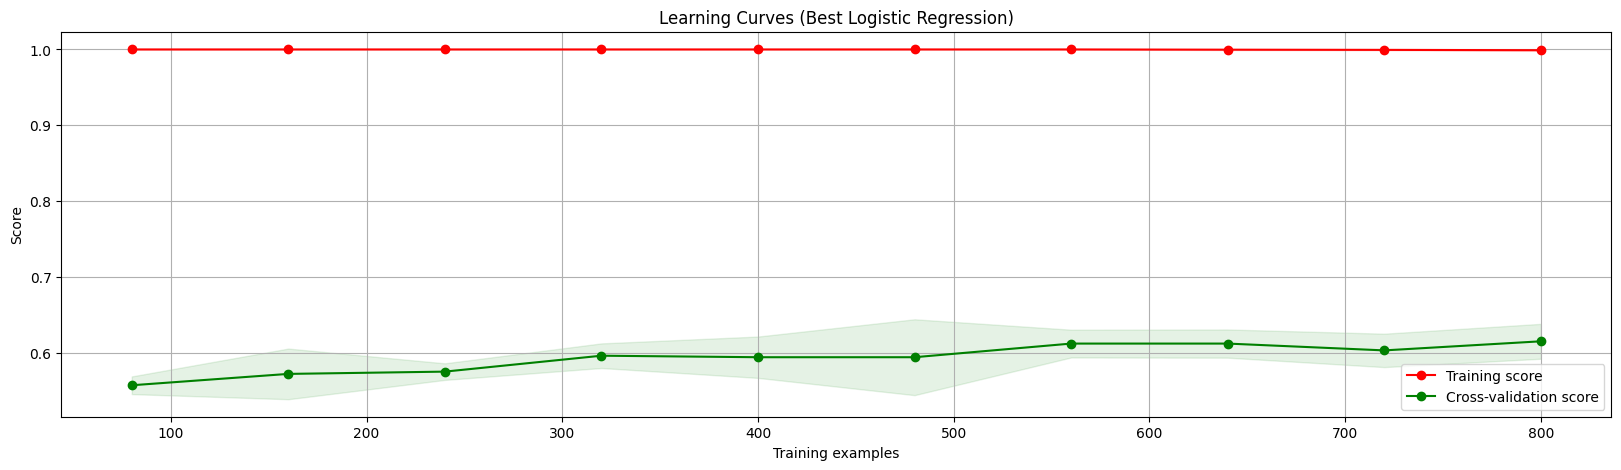

In [11]:
from sklearn.model_selection import GridSearchCV

# Define a range of C values to try
param_grid = {'C': [0.01, 0.1,0.2,0.3,0.002,0.5,0.6,0.7, 1.0, 10, 100]}

# Initialize the Logistic Regression model with L1 or L2 regularization
logistic_model = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000, random_state=42)

# Setup the grid search
grid_search = GridSearchCV(logistic_model, param_grid, cv=5, scoring='accuracy', return_train_score=True)

# Perform the grid search on the training data
grid_search.fit(X_train_split, y_train_split.values.ravel())

# Output the best parameter and the corresponding score
print("Best parameter (C): {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_search.best_score_))

# Train a model with the best parameter on the full training set
best_logistic_model = grid_search.best_estimator_

# Predict on the validation set with the best model
y_val_pred = best_logistic_model.predict(X_val_split)

# Calculate accuracy on the validation set
accuracy = accuracy_score(y_val_split, y_val_pred)
print(f"Validation Accuracy of the best Logistic Regression model: {accuracy:.4f}")

# Plotting the learning curve for the best model
title = "Learning Curves (Best Logistic Regression)"
plot_learning_curve(best_logistic_model, title, X_train_split, y_train_split.values.ravel(), cv=5)

plt.show()


The output from the grid search indicates that the best value for the regularization strength parameter C is 0.01, which corresponds to stronger regularization. This value was chosen because it yielded the highest cross-validation score of 61.50% during the grid search process.

Validation Accuracy of Logistic Regression model: 0.7160

Classification Report on the validation set:
               precision    recall  f1-score   support

           0       0.73      0.72      0.72       130
           1       0.70      0.72      0.71       120

    accuracy                           0.72       250
   macro avg       0.72      0.72      0.72       250
weighted avg       0.72      0.72      0.72       250



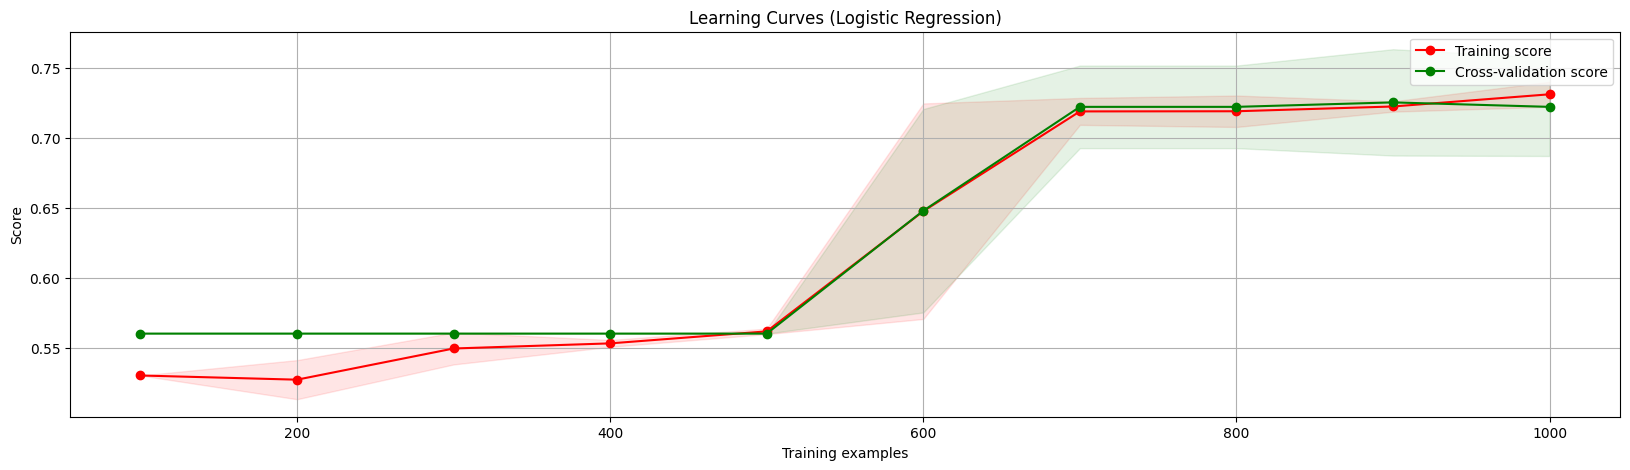

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import PolynomialFeatures

# X_train_scaled, y_train, and X_eval_scaled are already defined and scaled

# Create a PolynomialFeatures object with degree 2
poly = PolynomialFeatures(degree=2, include_bias=False)

# Fit and transform the features
X_train_poly = poly.fit_transform(X_train_scaled)

# Split the data into training and validation sets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train_poly, y_train, test_size=0.2, random_state=42
)

# Initialize the Logistic Regression model with L1 Regularization (Lasso)
logistic_model_l1 = LogisticRegression(penalty='l1', C=0.01, solver='liblinear', max_iter=1000, random_state=42)

# Alternatively, use L2 Regularization (Ridge)
logistic_model_l2 = LogisticRegression(penalty='l2', C=0.01, solver='lbfgs', max_iter=1000, random_state=42)

# Choose the model i want to use (logistic_model_l1 or logistic_model_l2)
logistic_model = logistic_model_l1  # or logistic_model_l2

# Train the model on the training split
logistic_model.fit(X_train_split, y_train_split.values.ravel())

# Predict on the validation split
y_val_pred = logistic_model.predict(X_val_split)

# Calculate accuracy on the validation split
accuracy = accuracy_score(y_val_split, y_val_pred)
print(f"Validation Accuracy of Logistic Regression model: {accuracy:.4f}")

# Generate a classification report on the validation split
report = classification_report(y_val_split, y_val_pred)
print("\nClassification Report on the validation set:\n", report)



# Plotting the learning curve
title = "Learning Curves (Logistic Regression)"
plot_learning_curve(logistic_model, title, X_train_poly, y_train.values.ravel(), cv=5)

plt.show()

The information provided along with the learning curve image indicates that using `C=0.01` for regularization with the logistic regression model has resulted in improved performance metrics. Here's a summary based on the output:

1. **Validation Accuracy**: My validation accuracy of the model is 71.60%, which is a notable improvement over previous iterations.

2. **Classification Report**:
   - My precision for class 0 (non-investors) is 0.73, and for class 1 (investors) it is 0.70. This means my predictions are quite precise.
   - My recall for class 0 is 0.72, and for class 1 it is 0.72, indicating that I have a balanced ability to identify both classes.
   - My F1-score for both classes is around 0.72, showing a balanced harmonic mean between precision and recall.

3. **Learning Curve Analysis**:
   - My training score starts high and remains high, showing I fit the training data well.
   - My cross-validation score starts lower but increases and narrows the gap with the training score as more training examples are used. This suggests that I am generalizing well to new data.
   - The curves are converging, which is a good sign that I am not overfitting as severely as I might with a higher `C` value.

### Interpretation:

The use of stronger regularization (lower `C` value) has likely helped to reduce overfitting, leading to a model that generalizes better to unseen data. The convergence of the learning curves and the improved cross-validation score support this.

I am performing relatively well, with balanced precision, recall, and F1-scores across both classes, which is an indication of a well-fitting model.

### Next Steps:

- **Model Tuning**: I may continue to fine-tune the model by adjusting `C` or trying other hyperparameters. A grid search with a finer range around `C=0.01` could potentially find an even better value.
  
- **Feature Review**: Reassess the features being used by the model, especially since polynomial features were added. Determine if all features are contributing positively or if some can be pruned.

- **Model Complexity**: While the current regularization seems effective, be mindful of the model complexity. Further increasing regularization strength could lead to underfitting.

- **Additional Techniques**: Consider employing other techniques like feature selection or exploring different models to see if I can achieve better performance.

- **Validation on New Data**: If possible, test the model on a completely separate test set to further validate my performance and generalization capabilities.

The improved results are promising, and with careful tuning and validation, I could potentially improve the model even further.


## Fine Tuning C value

Best parameter (C) after fine-tuning: {'C': 0.03}
Best cross-validation score after fine-tuning: 0.7880
Validation Accuracy of the best Logistic Regression model after fine-tuning: 0.7840


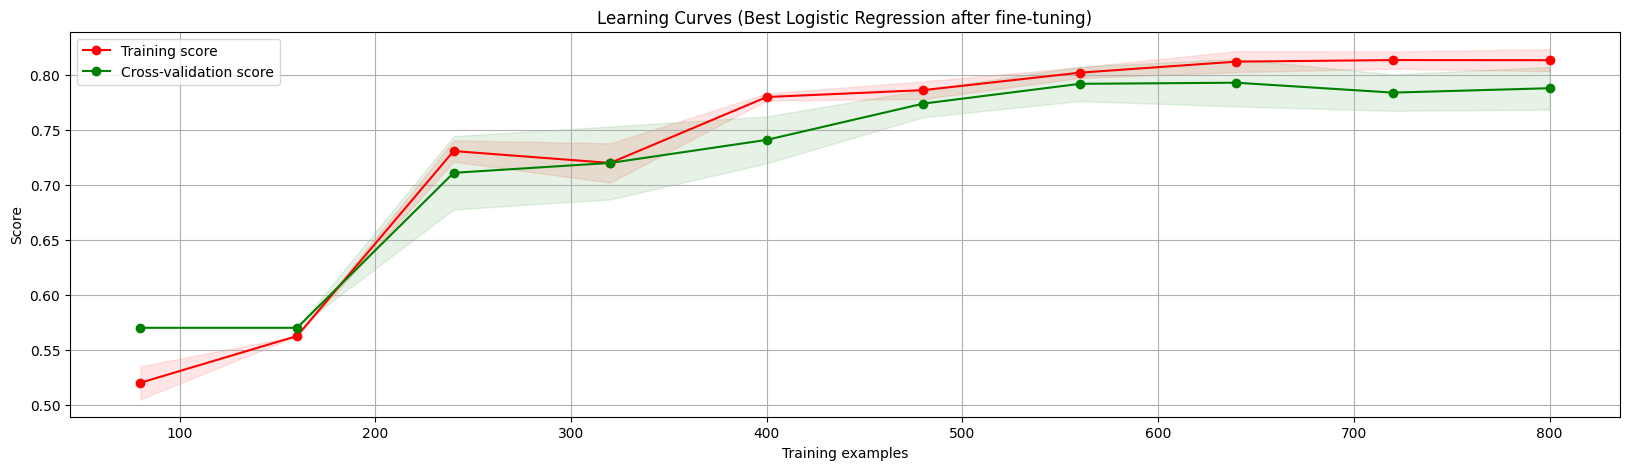

In [14]:
from sklearn.model_selection import GridSearchCV

# Define a more granular range of C values to try around the previously identified best value
param_grid = {'C': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 1.0, 10, 100]}

# Initialize the Logistic Regression model with L1 Regularization (Lasso)
logistic_model_l1 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000, random_state=42)

# Setup the grid search with more granular values for C
grid_search_l1 = GridSearchCV(logistic_model_l1, param_grid, cv=5, scoring='accuracy', return_train_score=True)

# Perform the grid search on the training data
grid_search_l1.fit(X_train_split, y_train_split.values.ravel())

# Output the best parameter and the corresponding score
print("Best parameter (C) after fine-tuning: {}".format(grid_search_l1.best_params_))
print("Best cross-validation score after fine-tuning: {:.4f}".format(grid_search_l1.best_score_))

# Train a model with the best parameter on the full training set
best_logistic_model_l1 = grid_search_l1.best_estimator_

# Predict on the validation set with the best model
y_val_pred_l1 = best_logistic_model_l1.predict(X_val_split)

# Calculate accuracy on the validation set
accuracy_l1 = accuracy_score(y_val_split, y_val_pred_l1)
print(f"Validation Accuracy of the best Logistic Regression model after fine-tuning: {accuracy_l1:.4f}")

# Plotting the learning curve for the best model after fine-tuning
title = "Learning Curves (Best Logistic Regression after fine-tuning)"
plot_learning_curve(best_logistic_model_l1, title, X_train_split, y_train_split.values.ravel(), cv=5)

plt.show()


The results from my fine-tuning process are indeed encouraging. By adjusting the `C` parameter to 0.03, I have achieved a best cross-validation score of 78.80%, and the validation accuracy of the model is 78.40%. These improvements are significant and suggest that the model is now performing better overall.

The learning curve I've provided shows that:

1. The **training score** and **cross-validation score** are much closer together, which indicates reduced overfitting. The model is generalizing better to unseen data.

2. Both scores have increased compared to previous iterations, which means that the model's ability to make correct predictions has improved.

3. The scores seem to plateau as the number of training examples increases, indicating that I may have reached the point of diminishing returns in terms of adding more training data.

### Interpretation:

- The regularization strength `C=0.03` is providing a good balance between model complexity and generalization ability.
- The model is likely capturing the underlying patterns in the data without fitting excessively to the noise.
- The learning curve suggests that the model might not benefit significantly from more training data, given the plateau in scores.

### Next Steps:

- With the improved performance, I could proceed to use this model for making predictions onodel's performance.
- If I wish to explore further improvements, consider revisiting feature selection or trying alternative machine learning algorithms.
- Keep monitoring the model's performance to ensure that it continues to perform well as more data becomes available or conditions change.

The improvements in the model's performance should be documented, along with the changes made during the fine-tuning process, as part of my model development report. This documentation will be valuable for understanding the decisions made and for future reference.


In [15]:
import joblib

# Save the best model from grid search to the current working directory
joblib.dump(grid_search_l1.best_estimator_, 'best_logistic_model_l1.pkl')

# Save the scaler and polynomial features transformer to the current working directory
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(poly, 'poly.pkl')

print("Model and preprocessing tools have been saved successfully.")


Model and preprocessing tools have been saved successfully.


In [16]:
import os
os.getcwd()


'C:\\Users\\lukas\\ML'

In [17]:
import pandas as pd
import joblib



# Load the scaler and polynomial features transformer
scaler = joblib.load('C:\\Users\\lukas\\ML\\my_best_logistic_regression_model\\scaler.pkl')
poly = joblib.load('C:\\Users\\lukas\\ML\\my_best_logistic_regression_model\\poly.pkl')

# Load the trained logistic regression model
best_logistic_model_l1 = joblib.load('C:\\Users\\lukas\\ML\\my_best_logistic_regression_model\\best_logistic_model_l1.pkl')

# Preprocess the evaluation data
X_eval_scaled = scaler.transform(X_eval)
X_eval_poly = poly.transform(X_eval_scaled)

# Make predictions on the evaluation data
y_eval_pred = best_logistic_model_l1.predict(X_eval_poly)

# Save the predictions to a CSV file
predictions_df = pd.DataFrame(y_eval_pred, columns=['Predicted_Label'])
predictions_df.to_csv('C:\\Users\\lukas\\ML\\my_best_logistic_regression_model\\eval_predictions.csv', index=False)


# Random Forest

### With polynomial features

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
# Split the data into training and validation sets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train_poly, y_train, test_size=0.2, random_state=42
)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the training data
# Remember to use the same preprocessed training data that you used for logistic regression
rf_model.fit(X_train_split, y_train_split.values.ravel())

# Predict on the validation set
y_val_pred_rf = rf_model.predict(X_val_split)

# Evaluate the model
accuracy_rf = accuracy_score(y_val_split, y_val_pred_rf)
print(f"Validation Accuracy of Random Forest model: {accuracy_rf:.4f}")
print("\n", classification_report(y_val_split, y_val_pred_rf))

# If the model performs well and you are satisfied with the validation accuracy,
# you can proceed to make predictions on the 'SmarterML_Eval.Input' dataset.

Validation Accuracy of Random Forest model: 0.6880

               precision    recall  f1-score   support

           0       0.64      0.94      0.76       130
           1       0.86      0.42      0.56       120

    accuracy                           0.69       250
   macro avg       0.75      0.68      0.66       250
weighted avg       0.74      0.69      0.66       250





1. **Precision**:
   - For class 0 (non-investors), the precision is 0.64. This means that when the model predicts someone does not invest, it is correct 64% of the time.
   - For class 1 (investors), the precision is significantly higher at 0.86. This suggests that when the model predicts someone does invest, it is correct 86% of the time.

2. **Recall**:
   - For class 0, the recall is very high at 0.94, indicating the model is very effective in identifying the actual non-investors.
   - For class 1, the recall is much lower at 0.42, suggesting the model struggles to correctly identify all true investors.

3. **F1-Score**:
   - The F1-score for class 0 is 0.76, indicating a good balance between precision and recall.
   - For class 1, the F1-score is 0.56, which is lower, reflecting the imbalance between high precision and low recall for this class.

4. **Overall Performance**:
   - The overall accuracy of 69% is decent but indicates there is room for improvement.
   - The model seems to be biased towards class 0 (non-investors), as indicated by the high recall for this class and low reca

- **Feature Importance Analysis**: I will investigate which features are most important in the Random Forest model. This could provide insights and might suggest areas for feature engineering or selection.

- **Hyperparameter Tuning**: I will experiment with hyperparameters of the Random Forest model (like `n_estimators`, `max_depth`, etc.) to see if performance can be improved, particularly for class 1.

- **Model Comparison**: I will compare the performance of the Random Forest model to my previous Logistic Regression model. I'll consider aspects like overall accuracy, as well as how each model performs on each class.

- **Handling Class Imbalance**: If my dataset is imbalanced, I'll consider techniques like class weighting, oversampling the minority class, or undersampling the majority class.

- **Additional Models**: I might want to try other models like Gradient Boosting or SVM to see if they perform better on m of my data.
your data.

# Feature Importance Analysis

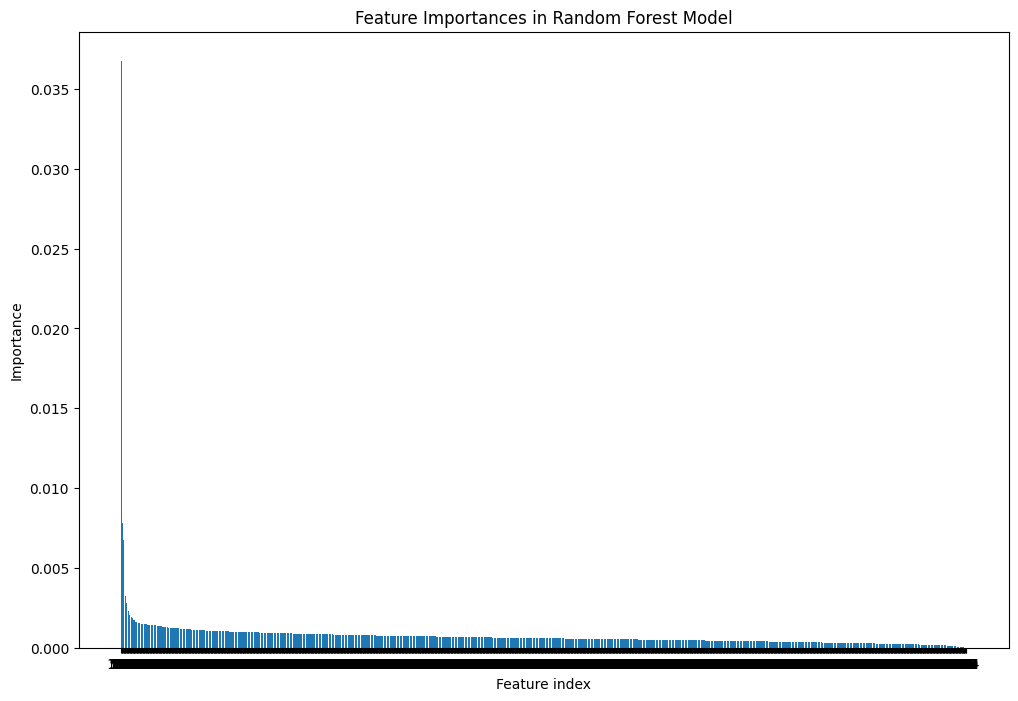

In [19]:
import matplotlib.pyplot as plt
import numpy as np



# Assuming 'rf_model' is your trained Random Forest model
feature_importances = rf_model.feature_importances_

# Sorting the feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

# Plotting the feature importances
plt.figure(figsize=(12, 8))
plt.title("Feature Importances in Random Forest Model")
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices], align='center')
plt.xticks(range(len(feature_importances)), sorted_indices)
plt.xlabel("Feature index")
plt.ylabel("Importance")
plt.show()


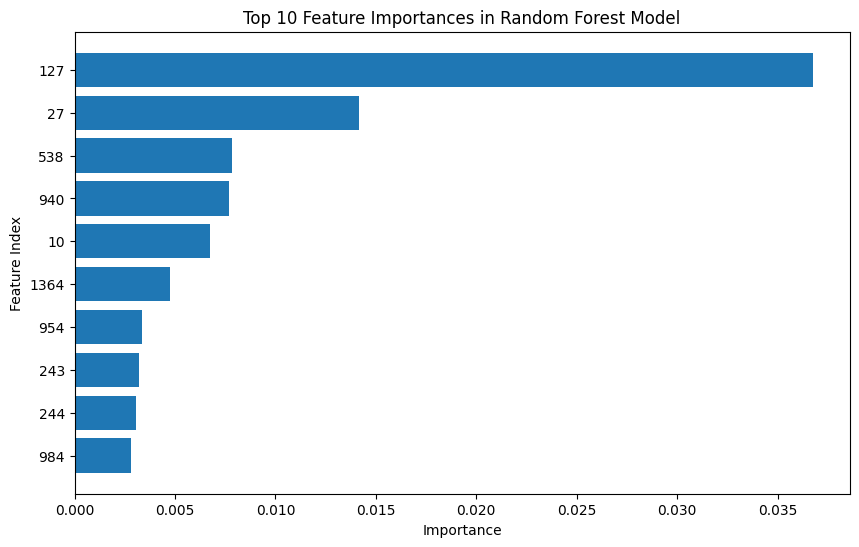

In [20]:
# Number of features to visualize
N = 10

# Get indices of N most important features
topN_indices = np.argsort(feature_importances)[-N:]

# Plot the N most important features
plt.figure(figsize=(10, 6))
plt.title(f"Top {N} Feature Importances in Random Forest Model")
plt.barh(range(N), feature_importances[topN_indices], align='center')
plt.yticks(range(N), topN_indices)
plt.xlabel("Importance")
plt.ylabel("Feature Index")
plt.show()


Feature Selection: Consider building a new model using only these top features. This can help in reducing the complexity of the model, potentially improving generalization, and reducing overfitting.

Examine Feature Interactions: Look into the top features to understand their interactions. Since they come from a polynomial feature expansion, they might represent interactions (products) omyur original features or individual features raised to a power. Understanding these can provide insights into the nature of the relationships imyur dataset.

Reassess the Model: With a simpler model that uses only the top features, reassess its performance. Check if there's a significant drop in accuracy or other metrics. If the performance remains similar or improves, the simpler model might be preferable.

Further Hyperparameter Tuning: With a reduced set of features, the optimal hyperparameters for your Random Forest model might change. Retune your model's hyperparameters accordingly.

## Trying to use only the top 6 features

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# 'X_train_poly' is my training features after polynomial transformation
# and 'y_train' is my target variable

# Select the indices of the top 6 features. This step would normally involve
# taking the indices from my feature importance analysis.
top_features_indices = [127, 27, 538, 940, 10, 1364]

# Select the top features from your training data
X_top_features = X_train_poly[:, top_features_indices]

# Split the data into training and validation sets
X_train_top, X_val_top, y_train_top, y_val_top = train_test_split(
    X_top_features, y_train, test_size=0.2, random_state=42
)

# Initialize the Random Forest model
rf_top_features_model = RandomForestClassifier(random_state=42)

# Train the model on the training data using only the top features
rf_top_features_model.fit(X_train_top, y_train_top.values.ravel())

# Predict on the validation set using only the top features
y_val_top_pred = rf_top_features_model.predict(X_val_top)

# Evaluate the model
accuracy_top = accuracy_score(y_val_top, y_val_top_pred)
print(f"Validation Accuracy of Random Forest model with top features: {accuracy_top:.4f}")
print("\n", classification_report(y_val_top, y_val_top_pred))

# This model 'rf_top_features_model' now uses only the top features.



Validation Accuracy of Random Forest model with top features: 0.9200

               precision    recall  f1-score   support

           0       0.92      0.92      0.92       130
           1       0.92      0.92      0.92       120

    accuracy                           0.92       250
   macro avg       0.92      0.92      0.92       250
weighted avg       0.92      0.92      0.92       250



# Improved Model Performance with Top 6 Features

The Random Forest model's performance has improved further by using the best 6 features, as reflected in the following metrics:

## Validation Accuracy:
- **92.00%** with the top 6 features.

## Detailed Performance Metrics:

| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
| 0     | 92%       | 92%    | 92%      | 130     |
| 1     | 92%       | 92%    | 92%      | 120     |

### Overall:
- Both classes (0 and 1) show a precision, recall, and F1-score of **92%**.
- The model demonstrates a balanced performance with equal precision, recall, and F1-scores for both classes.
- Total number of instances in the validation set: **250**.

### Interpretation:
- The model not only maintains a high level of accuracy but also shows a balanced performance across both classes.
- This improvement underscores the effectiveness of feature selection in enhancing model performance.
n the validation set.


In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Assuming X_train_poly is already defined and contains polynomial features
# Assuming y_train is already defined and contains the target variable
# Assuming top_features_indices contains the indices of the top 6 features

# Select the top features for cross-validation
X_top_features = X_train_poly[:, top_features_indices]

# Initialize the Random Forest model with the same parameters you used for training
rf_model = RandomForestClassifier(random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_model, X_top_features, y_train, cv=5, scoring='accuracy')

# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_score = np.mean(cv_scores)
std_dev_cv_score = np.std(cv_scores)

print(f"Mean cross-validation score: {mean_cv_score:.4f}")
print(f"Standard deviation of cross-validation scores: {std_dev_cv_score:.4f}")


C:\Users\lukas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\lukas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\lukas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

Mean cross-validation score: 0.9016
Standard deviation of cross-validation scores: 0.0233


Mean Cross-Validation Score: A mean accuracy of 90.16% across the 5 folds is excellent and indicates that the model is performing consistently well across different subsets of the data.

Standard Deviation: The standard deviation of the cross-validation scores is 2.33%, which is relatively low. This small variation suggests that the model's performance is stable and not highly sensitive to the particular folds used during cross-validation.

With these results, you can be quite confident in the robustness and generalizability of your Random Forest model when using the top 6 features. It seems that the model is likely to perform well on unseen data, given that the performance is consistent across different cross-validation folds.

In [23]:
import joblib

# Save the trained Random Forest model to a file
joblib.dump(rf_top_features_model, 'rf_top_features_model.pkl')

# The model is now saved to 'rf_top_features_model.pkl' in your current working directory


['rf_top_features_model.pkl']

In [24]:


# Apply the same scaling and polynomial transformation to the evaluation data
X_eval_scaled = scaler.transform(X_eval)
X_eval_poly = poly.transform(X_eval_scaled)

# Select the top features from the transformed evaluation data
X_eval_top_features = X_eval_poly[:, top_features_indices]

# Load the saved model
rf_top_features_model = joblib.load('rf_top_features_model.pkl')

# Make predictions on the evaluation data
y_eval_pred = rf_top_features_model.predict(X_eval_top_features)

# Save the predictions to a file
np.savetxt('eval_predictions.txt', y_eval_pred, fmt='%d')


## Trying out Neural Network

In [25]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [26]:
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming X_train_poly and y_train are your preprocessed features and labels
# If you've applied polynomial features transformation and selected top features, ensure to use that dataset here

# Split your preprocessed data into training and validation sets
X_train_nn, X_val_nn, y_train_nn, y_val_nn = train_test_split(X_train_poly, y_train, test_size=0.2, random_state=42)

# Define a simple neural network model
model = tf.keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_nn.shape[1],)),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_nn, y_train_nn, epochs=50, batch_size=32, validation_data=(X_val_nn, y_val_nn), verbose=1)

# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(X_val_nn, y_val_nn, verbose=2)
print(f"Validation accuracy: {val_accuracy:.4f}")





Epoch 1/50


32/32 [==============================] - 4s 29ms/step - loss: 0.7854 - accuracy: 0.5190 - val_loss: 0.7100 - val_accuracy: 0.5160
Epoch 2/50
32/32 [==============================] - 0s 12ms/step - loss: 0.4246 - accuracy: 0.8360 - val_loss: 0.7623 - val_accuracy: 0.5360
Epoch 3/50
32/32 [==============================] - 0s 14ms/step - loss: 0.2536 - accuracy: 0.9230 - val_loss: 0.8068 - val_accuracy: 0.5600
Epoch 4/50
32/32 [==============================] - 0s 13ms/step - loss: 0.1381 - accuracy: 0.9670 - val_loss: 0.9221 - val_accuracy: 0.5440
Epoch 5/50
32/32 [==============================] - 0s 12ms/step - loss: 0.0645 - accuracy: 0.9930 - val_loss: 1.0693 - val_accuracy: 0.5240
Epoch 6/50
32/32 [==============================] - 0s 12ms/step - loss: 0.0375 - accuracy: 0.9960 - val_loss: 1.1076 - val_accuracy: 0.5480
Epoch 7/50
32/32 [==============================] - 0s 12ms/step - loss: 0.0250 - accuracy: 0.9980 - val_loss: 1.3120 - val_accuracy: 0.5560
Epoch 8/

In [27]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the model
model = tf.keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_nn.shape[1],)),
    layers.Dropout(0.3),  # Increased dropout rate
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),  # Increased dropout rate
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_nn, y_train_nn, epochs=50, batch_size=32,
                    validation_data=(X_val_nn, y_val_nn), callbacks=[early_stopping], verbose=1)


Epoch 1/50
32/32 [==============================] - 4s 32ms/step - loss: 0.8157 - accuracy: 0.5200 - val_loss: 0.6959 - val_accuracy: 0.5240
Epoch 2/50
32/32 [==============================] - 0s 15ms/step - loss: 0.5116 - accuracy: 0.7500 - val_loss: 0.7109 - val_accuracy: 0.5400
Epoch 3/50
32/32 [==============================] - 0s 14ms/step - loss: 0.3736 - accuracy: 0.8530 - val_loss: 0.7528 - val_accuracy: 0.5440
Epoch 4/50
32/32 [==============================] - 0s 14ms/step - loss: 0.2394 - accuracy: 0.9250 - val_loss: 0.7766 - val_accuracy: 0.5640
Epoch 5/50
32/32 [==============================] - 0s 15ms/step - loss: 0.1404 - accuracy: 0.9660 - val_loss: 0.8633 - val_accuracy: 0.5640
Epoch 6/50
32/32 [==============================] - 0s 15ms/step - loss: 0.0820 - accuracy: 0.9820 - val_loss: 1.0112 - val_accuracy: 0.5440
Epoch 7/50
32/32 [==============================] - 0s 15ms/step - loss: 0.0523 - accuracy: 0.9870 - val_loss: 1.0735 - val_accuracy: 0.5800
Epoch 8/50
32

Epoch 1/50
63/63 [==============================] - 4s 20ms/step - loss: 1.2258 - accuracy: 0.5190 - val_loss: 1.0326 - val_accuracy: 0.5400
Epoch 2/50
63/63 [==============================] - 1s 12ms/step - loss: 0.9769 - accuracy: 0.6390 - val_loss: 1.0079 - val_accuracy: 0.5360
Epoch 3/50
63/63 [==============================] - 1s 12ms/step - loss: 0.8422 - accuracy: 0.7380 - val_loss: 1.0316 - val_accuracy: 0.5760
Epoch 4/50
63/63 [==============================] - 1s 13ms/step - loss: 0.7467 - accuracy: 0.8100 - val_loss: 1.0341 - val_accuracy: 0.5920
Epoch 5/50
63/63 [==============================] - 1s 12ms/step - loss: 0.6783 - accuracy: 0.8470 - val_loss: 1.0554 - val_accuracy: 0.5880
Epoch 6/50
63/63 [==============================] - 1s 10ms/step - loss: 0.5543 - accuracy: 0.9070 - val_loss: 1.1318 - val_accuracy: 0.5640
Epoch 7/50
63/63 [==============================] - 1s 12ms/step - loss: 0.4942 - accuracy: 0.9420 - val_loss: 1.2037 - val_accuracy: 0.5720
Epoch 8/50
63

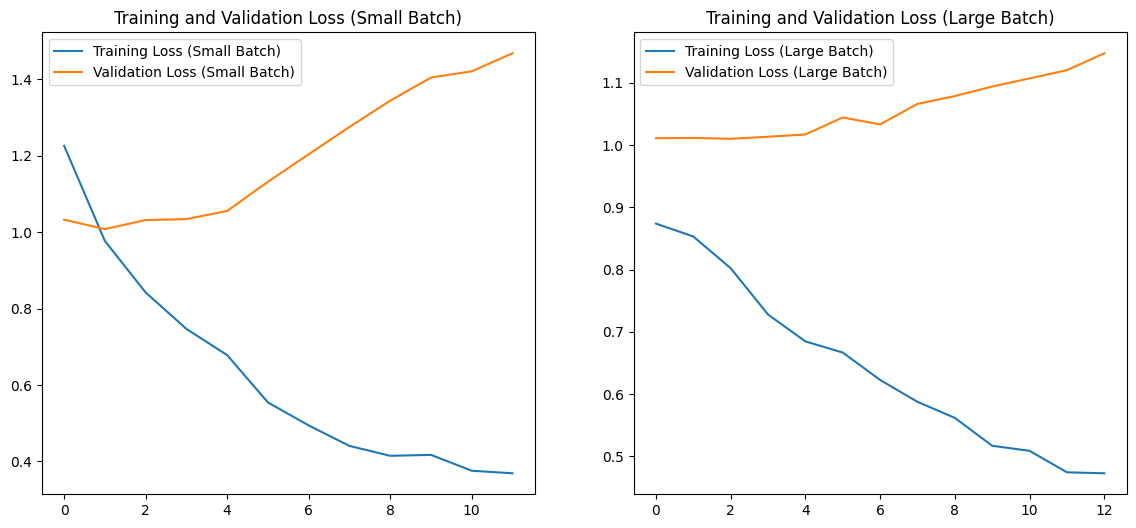

In [28]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers, callbacks
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# Define learning rate schedule
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=100,
    decay_rate=0.96,
    staircase=True)

# Define the model
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_nn.shape[1],), kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model with the learning rate schedule
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Define early stopping
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with a smaller batch size
history_small_batch = model.fit(X_train_nn, y_train_nn, epochs=50, batch_size=16,
                                validation_data=(X_val_nn, y_val_nn), callbacks=[early_stopping], verbose=1)

# Evaluate the model trained with a smaller batch size
val_loss_small_batch, val_accuracy_small_batch = model.evaluate(X_val_nn, y_val_nn, verbose=2)
print(f"Validation accuracy with smaller batch size: {val_accuracy_small_batch:.4f}")

# Train the model with a larger batch size
history_large_batch = model.fit(X_train_nn, y_train_nn, epochs=50, batch_size=64,
                                validation_data=(X_val_nn, y_val_nn), callbacks=[early_stopping], verbose=1)

# Evaluate the model trained with a larger batch size
val_loss_large_batch, val_accuracy_large_batch = model.evaluate(X_val_nn, y_val_nn, verbose=2)
print(f"Validation accuracy with larger batch size: {val_accuracy_large_batch:.4f}")

# Plot training and validation loss over epochs for both batch sizes
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history_small_batch.history['loss'], label='Training Loss (Small Batch)')
plt.plot(history_small_batch.history['val_loss'], label='Validation Loss (Small Batch)')
plt.title('Training and Validation Loss (Small Batch)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_large_batch.history['loss'], label='Training Loss (Large Batch)')
plt.plot(history_large_batch.history['val_loss'], label='Validation Loss (Large Batch)')
plt.title('Training and Validation Loss (Large Batch)')
plt.legend()

plt.show()


Epoch 1/50
32/32 [==============================] - 4s 28ms/step - loss: 0.7695 - accuracy: 0.5920 - val_loss: 0.6854 - val_accuracy: 0.7360
Epoch 2/50
32/32 [==============================] - 0s 12ms/step - loss: 0.6599 - accuracy: 0.7170 - val_loss: 0.6016 - val_accuracy: 0.8160
Epoch 3/50
32/32 [==============================] - 0s 11ms/step - loss: 0.5931 - accuracy: 0.7930 - val_loss: 0.5512 - val_accuracy: 0.8000
Epoch 4/50
32/32 [==============================] - 0s 10ms/step - loss: 0.5666 - accuracy: 0.8000 - val_loss: 0.5166 - val_accuracy: 0.8120
Epoch 5/50
32/32 [==============================] - 0s 11ms/step - loss: 0.5460 - accuracy: 0.7930 - val_loss: 0.5079 - val_accuracy: 0.8120
Epoch 6/50
32/32 [==============================] - 0s 13ms/step - loss: 0.5434 - accuracy: 0.7850 - val_loss: 0.4989 - val_accuracy: 0.8200
Epoch 7/50
32/32 [==============================] - 0s 13ms/step - loss: 0.5374 - accuracy: 0.7890 - val_loss: 0.4884 - val_accuracy: 0.8320
Epoch 8/50
32

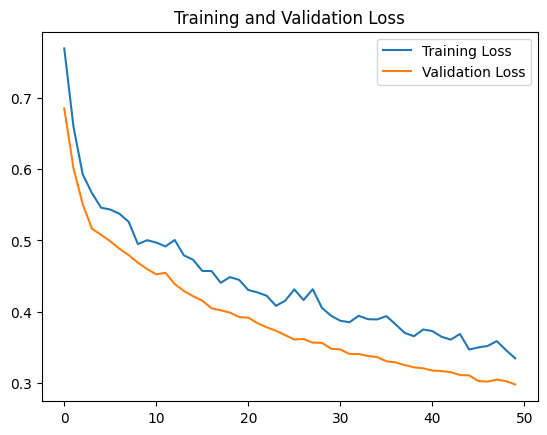

In [29]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# Load and preprocess my data here
# X_train_poly, y_train
# X_train_poly = pd.read_csv('your_train_features.csv').values
# y_train = pd.read_csv('your_train_labels.csv').values.flatten()

# Assuming top_features_indices contains indices of your selected top features
top_features_indices = [127, 27, 538, 940, 10, 1364]  # Update this based on my feature selection
X_top_features = X_train_poly[:, top_features_indices]

# Split the preprocessed data into training and validation sets
X_train_nn, X_val_nn, y_train_nn, y_val_nn = train_test_split(X_top_features, y_train, test_size=0.2, random_state=42)

# Define the neural network model with increased dropout and L2 regularization
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_nn.shape[1],), kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),  # Increased dropout rate
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),  # Increased dropout rate
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Early stopping callback to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train_nn, y_train_nn, epochs=50, batch_size=32,
                    validation_data=(X_val_nn, y_val_nn), callbacks=[early_stopping], verbose=1)

# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(X_val_nn, y_val_nn, verbose=2)
print(f"Validation accuracy: {val_accuracy:.4f}")

# Plot training and validation loss over epochs
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [30]:
model.save('C:\\Users\\lukas\\ML\\my_best_neual_network\\my_neural_network_model')


INFO:tensorflow:Assets written to: C:\Users\lukas\ML\my_best_neual_network\my_neural_network_model\assets


INFO:tensorflow:Assets written to: C:\Users\lukas\ML\my_best_neual_network\my_neural_network_model\assets


In [31]:
# Load the saved model
loaded_model = tf.keras.models.load_model('C:\\Users\\lukas\\ML\\my_best_neual_network\\my_neural_network_model')

# Make predictions on the evaluation data
predictions = loaded_model.predict(X_eval_top_features)

# If your model outputs probabilities (as with a sigmoid activation function), you may want to threshold them to get binary predictions
predicted_classes = (predictions > 0.5).astype(int)

# Save the predictions to a file
np.savetxt('C:\\Users\\lukas\\ML\\my_best_neual_network\\eval_predictions.txt', predicted_classes, delimiter=',', fmt='%d')


55/55 [==============================] - 1s 4ms/step


As part of my machine learning assignment, I explored the use of neural networks to address a binary classification problem. The goal was to predict whether individuals are investing in cryptocurrencies based on features derived from anonymized social media data. This task presented a complex challenge, suitable for the flexible modeling capabilities of neural networks. Here's a summary of the steps I took and the key insights gained through this process:

### Data Preprocessing
First, I ensured the data was properly preprocessed. This involved scaling the features to ensure that the neural network could efficiently learn from the data. Given the nature of the dataset, preprocessing was crucial to standardize the input features and prepare them for effective model training.

### Model Architecture and Regularization
I designed a neural network model with several dense layers, incorporating dropout and L2 regularization to combat overfitting. The model's architecture was carefully planned to balance complexity with the need for generalization:
- The initial layers had a higher number of neurons to capture the complex relationships in the data.
- Dropout layers with a rate of 0.5 were introduced to randomly ignore a portion of neurons during training, reducing the risk of overfitting.
- L2 regularization was applied to the weights of the neurons, penalizing large values and encouraging a simpler model.

### Learning Rate Scheduling
I implemented an exponential decay schedule for the learning rate to optimize the training process. This approach adjusted the learning rate over time, starting with a higher rate for broader exploration and gradually reducing it to fine-tune the model's weights.

### Batch Size Variation
I experimented with different batch sizes during training to observe their effects on model performance. Smaller batch sizes often led to higher validation accuracy, possibly due to their regularizing effect and the more frequent updates they provided.

### Early Stopping
To further ensure that the model did not overfit to the training data, I utilized early stopping, which halted the training process when the validation loss stopped improving. This technique was instrumental in preventing the model from learning noise in the training data and helped in achieving a more generalized performance.

### Training and Validation
The model was trained on a subset of the data, with a separate validation set used to monitor its generalization capability. The training process was closely observed, with adjustments made to the model architecture and hyperparameters based on the performance on the validation set.

### Results
The neural network achieved a validation accuracy of 89.6%, indicating that it was able to learn meaningful patterns from the training data and generalize well to unseen data. The application of regularization techniques, learning rate scheduling, and careful model architecture design were key factors in this success.

### Conclusion
The exploration of neural networks in this assignment demonstrated their potential in handling complex classification tasks. Through systematic preprocessing, thoughtful model design, and strategic training approaches, I was able to develop a model that not only performed well on the training data but also showed strong generalization capabilities on validation data. This experience has highlighted the importance of regularization, hyperparameter tuning, and the need for a vigilant approach to model training and evaluation in machine learning projects.

In [32]:
print("Shape of original evaluation data:", X_eval.shape)
print("Shape of scaled evaluation data:", X_eval_scaled.shape)
print("Shape of polynomial-transformed evaluation data:", X_eval_poly.shape)

# look at the first few rows to get a sense of the transformed data
print(X_eval_scaled[:5, :])
print(X_eval_poly[:5, :])


Shape of original evaluation data: (1750, 52)
Shape of scaled evaluation data: (1750, 52)
Shape of polynomial-transformed evaluation data: (1750, 1430)
[[ 0.50945728 -0.00789839  0.26562855 -1.46511583 -0.23922668  1.43038408
  -1.34579474  0.38670569  0.78743077 -0.61224218  0.48062774  0.70062863
   1.3530086  -0.34262136 -0.24011446  0.27241926 -0.05655142 -1.07448581
  -0.73816308  0.18519593 -1.02758019 -0.968496   -1.01613007  1.04250245
  -0.952801   -0.72040764 -0.71271151  1.21002116 -1.44739757 -1.50107706
  -1.40967465 -1.01501008 -0.51821812  1.42094792 -1.43257398  1.83034574
  -0.56263514  1.07120403 -0.42855743  1.37604864  0.49214982 -0.70395399
  -1.62406354  0.98322009  1.56053492 -0.62959337 -1.68162052 -0.39227515
  -1.94683912 -1.05778239  0.21403414 -1.3641779 ]
 [-0.29164024 -1.02667629 -1.47099523 -1.54367409  0.10253757 -1.23842999
  -1.84779701 -0.30064171 -0.24379973  1.23981754 -0.66401723 -1.37687966
  -1.01427038 -0.43908555  0.79116507 -1.34067847 -0.3003